In [5]:
import pickle
from matplotlib import pyplot as plt


In [2]:
# Importing ndarray dictionaries from pickel file
file_path = "../data/mel_spectro_crop_dictionary_fix_dim.pickle"
with open (file_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
for num, num_list in data.items():
        print(  min ( [mat.shape[1] for mat in num_list] ))

6
6
6
6
6
6
6
6
6
6


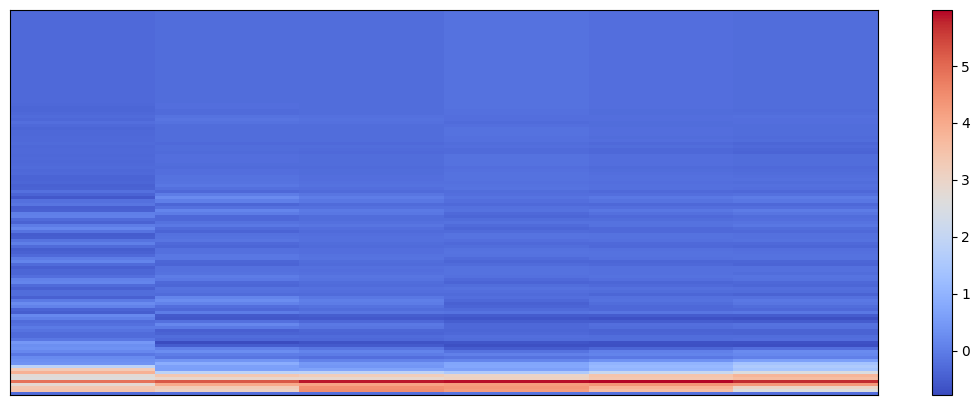

In [6]:
import librosa as librosa
plt.figure(figsize=(14,5))
img=librosa.display.specshow(data[9][10])
plt.colorbar()

In [7]:

import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
# Flatten the arrays to feed to SVM model
# true data has 286 list elements and each elememt is a numpy ndarray of size (128,41)
X = [np.ravel(vec) for num, num_vec in data.items() for vec in num_vec]
y = np.array([num for num, num_vec in data.items() for vec in num_vec], dtype = np.float32)


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)


In [10]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
clf  = make_pipeline(StandardScaler(),SVC(kernel='rbf', C=60, gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=60, gamma='auto'))])

In [12]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

0.3055555555555556


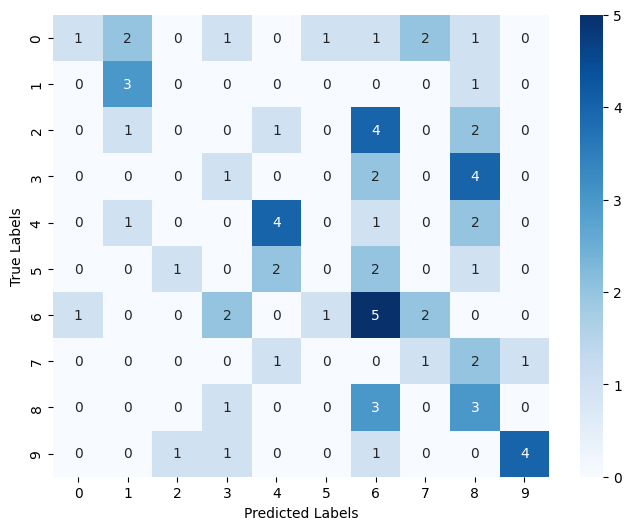

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.43      0.75      0.55         4
           2       0.00      0.00      0.00         8
           3       0.17      0.14      0.15         7
           4       0.50      0.50      0.50         8
           5       0.00      0.00      0.00         6
           6       0.26      0.45      0.33        11
           7       0.20      0.20      0.20         5
           8       0.19      0.43      0.26         7
           9       0.80      0.57      0.67         7

    accuracy                           0.31        72
   macro avg       0.30      0.32      0.28        72
weighted avg       0.31      0.31      0.28        72



In [13]:
# Evaluate model
# X_test = X_train
# y_test = y_train
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
accuracy = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Create a classification report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] # replace with your actual class names
print(classification_report(y_test, y_pred, target_names=target_names))